In [1]:
%cd /Users/Brett/Code/bricolage-dev/
from bricolage import lineage, threshold3, graph
from bricolage.analysis_ext import CausalFlowAnalyzer, Information, MutualInfoAnalyzer

/Users/Brett/Dropbox/Code/bricolage-dev


In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import numpy as np

In [39]:
# treat = lineage.Treatment("/Users/Brett/Dropbox/SimulationData/000")
# rep01 = treat.replicates[1]
# lin01 = rep01.get_lineage()
lin01 = lineage.FullLineage("/Users/Brett/Dropbox/SimulationData/001/lineage.h5")

In [40]:
net01 = lin01.population.get_best()[10]
graph.save_network_as_fullgraph(net01)
%pwd

saving 6384459


u'/Users/Brett/Dropbox/Code/bricolage-dev'

In [41]:
anc = lin01.get_ancestry(net01.identifier)

In [42]:
lin01.targets[0].as_array()

array([[ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.5 ,  0.25],
       [ 0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.5 ,  0.25],
       [ 1.  ,  0.5 ,  0.25],
       [ 1.  ,  0.5 ,  0.25]])

In [43]:
cf = CausalFlowAnalyzer(lin01.world, [0, .5, .25])
mf = MutualInfoAnalyzer(lin01.world, [0, 0, 0, 1, 0, 1, 1, 1])

In [44]:
joint = cf.analyse_collection(anc)
jointm = mf.analyse_collection(anc)
inf = Information(joint)
infm = Information(jointm)

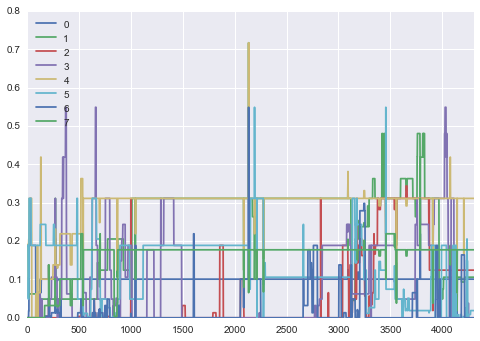

In [45]:
arr = np.asarray(infm)
arr.shape = arr.shape[0], arr.shape[1]
#arr = arr.sum(axis=2)
pd.DataFrame(arr).plot()

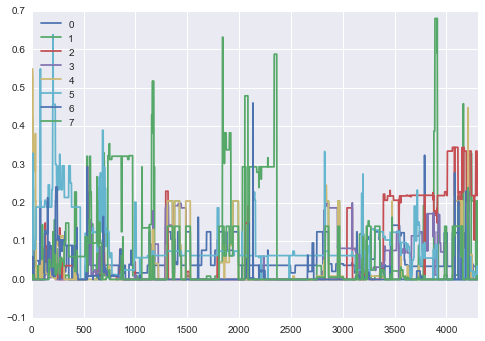

In [46]:
arr = np.asarray(inf)
summed = arr.sum(axis=2)
#summed = summed.sum(axis=1) / 3
pd.DataFrame(summed).plot()

In [47]:
graph.save_network_as_fullgraph(net01, name='bbb')

saving bbb


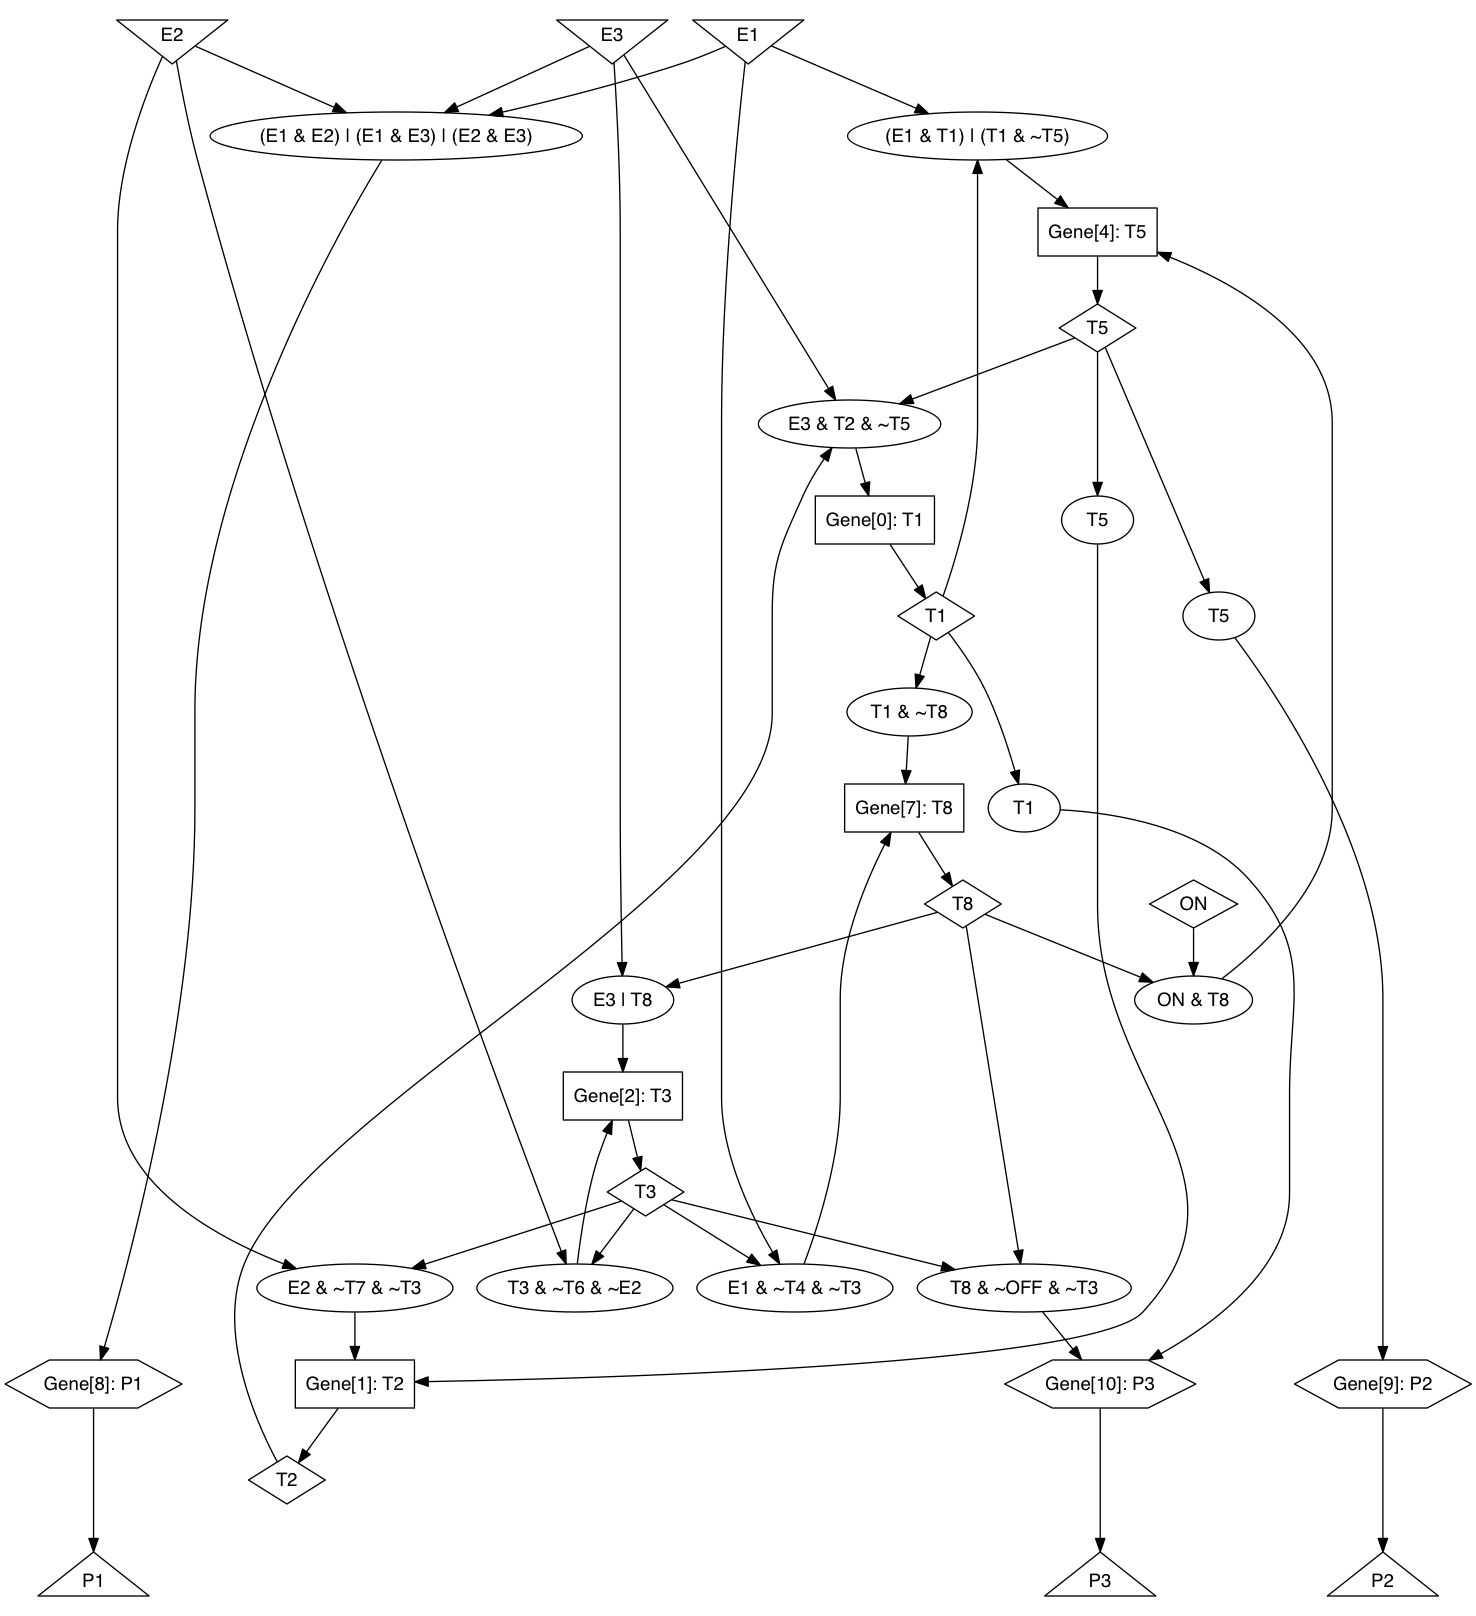

In [48]:
from IPython.display import Image
Image(filename='network-bbb.png', width=300) 